# Decision Tree

 - Yes or No 
 - 범주형 변수 Factor in R

In [14]:
library(stringr)

In [6]:
skin <- read.csv('data/skin.csv', header=T)
skin <- skin[-1]
head(skin)

,성별,나이,직장여부,결혼여부,차량보유여부,쿠폰반응여부
1,남,30대,NO,YES,NO,NO
2,여,20대,YES,YES,YES,NO
3,여,20대,YES,YES,NO,NO
4,여,40대,NO,NO,NO,NO
5,여,30대,NO,YES,NO,NO
6,여,30대,NO,NO,YES,NO


In [7]:
names(skin)

[1] "성별"         "나이"         "직장여부"     "결혼여부"     "차량보유여부"
[6] "쿠폰반응여부"

In [8]:
names(skin) <- c("sex","age","job","marry","car","react")

In [9]:
head(skin)

,sex,age,job,marry,car,react
1,남,30대,NO,YES,NO,NO
2,여,20대,YES,YES,YES,NO
3,여,20대,YES,YES,NO,NO
4,여,40대,NO,NO,NO,NO
5,여,30대,NO,YES,NO,NO
6,여,30대,NO,NO,YES,NO


In [11]:
skin$sex <- as.character(skin$sex)

In [12]:
skin$sex <- ifelse(skin$sex=="남","M","W")

In [15]:
skin$age <- str_replace(skin$age,"대","")

In [17]:
str(skin)

'data.frame':	30 obs. of  6 variables:
 $ sex  : chr  "M" "W" "W" "W" ...
 $ age  : chr  "30" "20" "20" "40" ...
 $ job  : Factor w/ 2 levels "NO","YES": 1 2 2 1 1 1 1 1 2 2 ...
 $ marry: Factor w/ 2 levels "NO","YES": 2 2 2 1 2 1 2 2 2 1 ...
 $ car  : Factor w/ 2 levels "NO","YES": 1 2 1 1 1 2 1 2 1 2 ...
 $ react: Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 2 2 1 ...


In [18]:
skin$sex <- factor(skin$sex)
skin$age <- factor(skin$age)

In [19]:
head(skin)

,sex,age,job,marry,car,react
1,M,30,NO,YES,NO,NO
2,W,20,YES,YES,YES,NO
3,W,20,YES,YES,NO,NO
4,W,40,NO,NO,NO,NO
5,W,30,NO,YES,NO,NO
6,W,30,NO,NO,YES,NO


## 알고리즘 
 - 엔트로피 : 정보의 무질서 혹은 복잡도/불확실성
 - $Entropy H = \sum_n^i{p(x_i)log_2p(x_i)}  $

In [20]:
x <- c("red","blue","blue","red","red")

#정보엔트로피를 구하는 함수 
info_entropy <- function(x) { 
  
  factor_x <- factor(x) 
  entropy <- 0 
  for(str in levels(factor_x)) {
      pro <- sum(x == str) / length(x) 
      entropy <- entropy - pro * log2(pro) 
  }
  return (entropy)
}

In [21]:
info_entropy(x)

[1] 0.9709506

In [22]:
for(str in colnames(skin)[1:5]) { 
        print(str)
}

[1] "sex"
[1] "age"
[1] "job"
[1] "marry"
[1] "car"


In [23]:
#새미의 데이터셋에 대하여 적용해 본 엔트로피 계산
#맨처음의 '쿠폰반응여부'의 엔트로피
first_entropy <- info_entropy(skin[,"react"])

for(str in colnames(skin)[1:5]) { 
    
    #str=조건변수 , factors=조건값집합
    factors <- levels(skin[[str]])
    
    #조건변수를 각각의 가능한 속성값으로 분류하였을때 '쿠폰반응여부'에 대한 엔트로피의 합계
    sum_entropy <- 0 
    for(str2 in factors) { 
      test_x <- skin[skin[[str]] == str2,][6]
      sum_entropy <- sum_entropy + info_entropy(test_x[,1])
    }
    cat(str , '---->' , sum_entropy,'\n')
    
}

sex ----> 1.641098 
age ----> 2.796506 
job ----> 1.887994 
marry ----> 0.9709506 
car ----> 1.932395 


 - Label을 가장 깔끔하게 나누는 정도라고 봐도 무방하다. 

In [24]:
library(rpart)

In [25]:
tree1 <- rpart(react ~., data=skin, control=rpart.control(minsplit=2)) #최소가지치기 2

In [29]:
options(repr.plot.width=5, repr.plot.height=4)

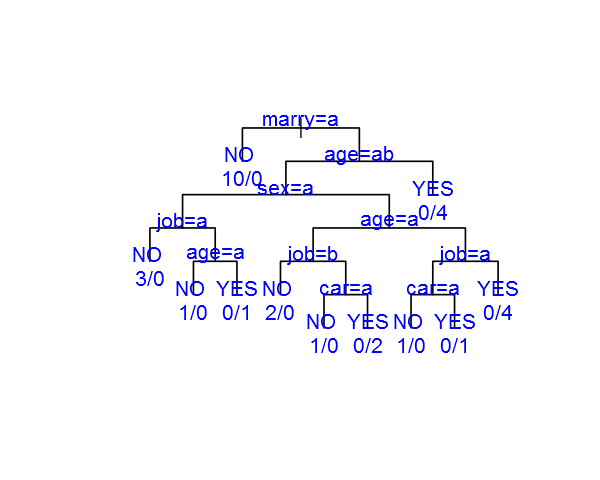

In [30]:
plot(tree1, compress = T, uniform = T, margin=0.1) # compress : 세로폭, uniform: 가로폭 을 줄여주는 인자.
text(tree1, use.n=T, col="blue")

In [31]:
tree1

n= 30 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 30 12 NO (0.6000000 0.4000000)  
    2) marry=NO 10  0 NO (1.0000000 0.0000000) *
    3) marry=YES 20  8 YES (0.4000000 0.6000000)  
      6) age=20,30 16  8 NO (0.5000000 0.5000000)  
       12) sex=M 5  1 NO (0.8000000 0.2000000)  
         24) job=NO 3  0 NO (1.0000000 0.0000000) *
         25) job=YES 2  1 NO (0.5000000 0.5000000)  
           50) age=20 1  0 NO (1.0000000 0.0000000) *
           51) age=30 1  0 YES (0.0000000 1.0000000) *
       13) sex=W 11  4 YES (0.3636364 0.6363636)  
         26) age=20 5  2 NO (0.6000000 0.4000000)  
           52) job=YES 2  0 NO (1.0000000 0.0000000) *
           53) job=NO 3  1 YES (0.3333333 0.6666667)  
            106) car=NO 1  0 NO (1.0000000 0.0000000) *
            107) car=YES 2  0 YES (0.0000000 1.0000000) *
         27) age=30 6  1 YES (0.1666667 0.8333333)  
           54) job=NO 2  1 NO (0.5000000 0.5000000)  
            108) car=NO 1  0 NO 

 - Pruning(가지치기) : Overfitting 방지. 